## Importing Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 100

# modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# processing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#warnings
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*') #make the warnings appear only once for ConvergenceWarnings to make the output cleaner


### Reading the Data 

In [2]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
data = pd.read_csv('../datasets/test_train_cleaned.csv')
polyed_data = pd.read_csv('../datasets/test_train_ployed.csv')

In [3]:
#saving the origibal test.csv to test_original
#will be used later to retrive the test Id
test_original = test

In [4]:
#the metric i used to merge the train and test dataframes together.
#i use them to tell it where to split the data into two DFs
train_rows = train.shape[0] 
test_rows = test.shape[0]

In [5]:
#splits the data and assigns the X,y 
X = polyed_data[:train_rows]   #featutes
test = polyed_data[train_rows:] #test.csv
y = train['SalePrice'] # Sale Price

In [6]:
y.shape

(2051,)

## Modeling

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

#### Baseline Modeling:

In [8]:
#getting the mean of the 'SalePrice' column
baseline_pred = np.mean(y)

In [9]:
#duplicated the mean for the size of 'train' rows.
baseline_preds = [baseline_pred for i in range(len(train))]

Scoring our baseline prediction by mean squared error and mean absolute error


In [10]:
print(f"MAE : {mean_absolute_error(baseline_preds, y)}" )
print(f"MSE : {mean_squared_error(baseline_preds, y)}" )

MAE : 58358.94084226196
MSE : 6278872217.837828


### 1. Linear Regression:

In [11]:
# Fit and institute Linear Regression on Training Set
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#cvs score
cross_val_score(lr, X_test, y_test, cv=10).mean()

0.7857212276409447

In [13]:
lr.score(X_train, y_train)

0.9608075437653382

In [14]:
lr.score(X_test, y_test)

0.9099052761779279

We can see that our model is overfitting.

In [15]:
print(f"MAE : {mean_absolute_error(lr.predict(X_train), y_train)}" )
print(f"MSE : {mean_squared_error(lr.predict(X_train), y_train)}" )

MAE : 10733.03077439183
MSE : 247873482.1918384


There a big difference between taking the average and using linear regression modeling

In [16]:
#saving the predicated values
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


Lets see how our coefficients are scattered:

In [17]:
#finds the coefficience for each feature and sort them in descending order
pd.DataFrame({'feature':X_train.columns, 
              'coefficient': lr.coef_}).sort_values(by='coefficient').head()

,feature,coefficient
281,Pool QC_None,-117656.823263
230,BsmtFin Type 2_None,-79553.397747
151,Roof Style_Mansard,-63931.518118
275,Garage Qual_Po,-38005.900932
133,Condition 2_PosN,-36809.056273


In [18]:
#finds the coefficience for each feature and sort them in ascending order
pd.DataFrame({'feature':X_train.columns, 
              'coefficient': lr.coef_}).sort_values(by='coefficient', ascending=False).head()

,feature,coefficient
3,Overall Qual_x,1.999856e+06
38,Overall Qual_y,1.999846e+06
159,Roof Matl_WdShngl,1.802735e+06
158,Roof Matl_WdShake,1.773657e+06
154,Roof Matl_Membran,1.761340e+06


- For the Training data, lets see how our predicted Sale Prices were from the actual

Text(0.5, 1.0, 'SalePrice: Actual vs. Predicted')

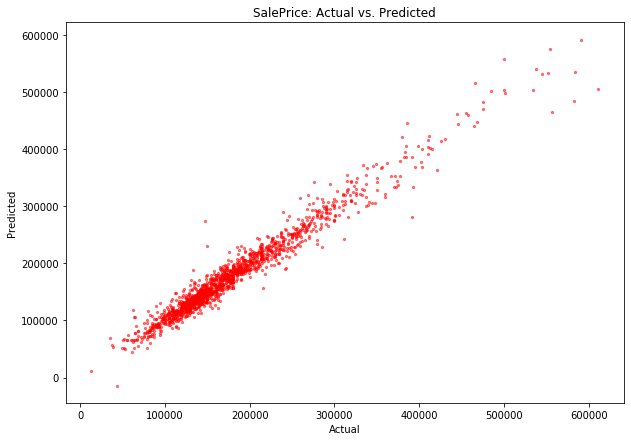

In [19]:
# plotting actual SalePrice vs predicted SalePrice for the 'y_train' data
plt.figure(figsize= (10,7))
plt.scatter(y_train, y_train_pred,  color='red', alpha=0.5, s=5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SalePrice: Actual vs. Predicted')


- For the Testing data, lets see how our predicted Sale Prices were from the actual



In [20]:
#checking the highest coefficient value
lr.coef_.max()

1999856.1874044307

Text(0.5, 1.0, 'SalePrice: Actual vs. Predicted')

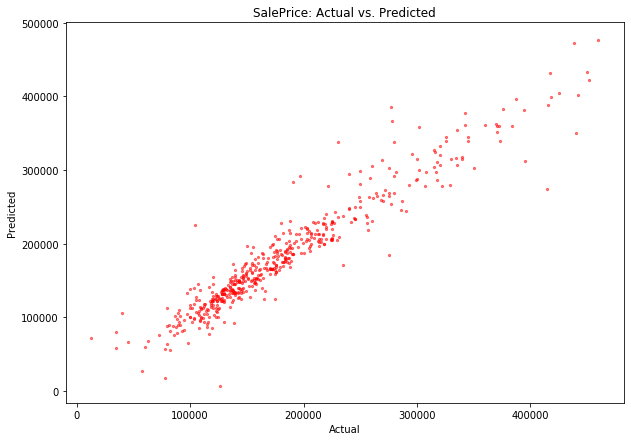

In [21]:
# plotting actual SalePrice vs predicted SalePrice for the 'y_test' data
plt.figure(figsize= (10,7))
plt.scatter(y_test, y_test_pred,  color='red', alpha=0.5, s=5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SalePrice: Actual vs. Predicted')



We can see that there are many house prices that are very different from the actual prices. the coefficient also can show that as well

### 2. LASSO

#### - alpha

In [22]:
#instituting and fitting Lasso
#For all the models, i am normalizing it because i am not scaling
lasso = Lasso(normalize=True, alpha=2)
lasso.fit(X_train, y_train)

/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9581537276.801697, tolerance: 972711210.8729936
  positive)


Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [23]:
cross_val_score(lasso, X_test, y_test, cv=5).mean()

/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2194441886.3431168, tolerance: 242695287.52579513
  positive)
/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1049964735.0223846, tolerance: 264562672.7166881
  positive)
/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 848039405.9619522, tolerance: 249548550.85456806
  positive)
/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might 

0.8401596616973892

In [24]:
lasso.score(X_train,y_train)

0.9521561613286623

In [188]:
lasso.score(X_test,y_test)

0.922891653252508

We have a little overfitted model but good overall

#### - CV

In [25]:
#instituting and fitting LassoCV
lasso_cv = LassoCV(cv =10, normalize=True,alphas= [13])
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=[13], copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [26]:
#lets check the score
lasso_cv.score(X_train,y_train)

0.937445519633313

In [27]:
lasso_cv.score(X_test,y_test)

0.9259582673566678

In [240]:
cross_val_score(lasso_cv, X_test, y_test, cv=10).mean()

/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 921690487.9762878, tolerance: 247967153.06956768
  tol, rng, random, positive)
/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275807565.95721436, tolerance: 245284335.1857894
  tol, rng, random, positive)
/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403619525.66778564, tolerance: 242449047.7902376
  tol, rng, random, positive)
/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: Conve

/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490578053.935318, tolerance: 252118309.3566593
  tol, rng, random, positive)
/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352556005.2101593, tolerance: 248583647.45068341
  tol, rng, random, positive)
/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 601161861.8207397, tolerance: 259302509.52782476
  tol, rng, random, positive)
/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: Converg

0.8940491190833064

The Lesso_cv is scoring great with not much overfitting. CVS is still low but much better

### 3. Ridge

#### - CV

In [28]:
#instituting and fitting ridgeCV
ridge_cv = RidgeCV(normalize=True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=True, scoring=None, store_cv_values=False)

In [29]:
#lets check the score
ridge_cv.score(X_train,y_train)

0.9389510421174191

In [30]:
ridge_cv.score(X_test,y_test)

0.920302402216595

In [196]:
cross_val_score(ridge_cv, X_test, y_test, cv=10).mean()

0.9138446993799821

The CVS score and the testing score are very good here and not over/under fitting

#### - alpha

In [31]:
#instituting and fitting ridgeCV
ridge = Ridge(normalize=True, alpha=0.1)
ridge.fit(X_train, y_train)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [32]:
ridge.score(X_train,y_train)

0.9389510421174161

In [33]:
ridge.score(X_test,y_test)

0.9203024022165777

In [200]:
cross_val_score(ridge, X_test, y_test, cv=10).mean()

0.904320793181147

Using RidgeCV gave better results

### 4. Random Forest

In [201]:
#checking different models because why not
rfr = RandomForestRegressor(n_estimators=500,     
                             random_state=42)

In [202]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [203]:
rfr.score(X_train,y_train)

0.9855860672647019

In [204]:
rfr.score(X_test,y_test)

0.9060554851392195

In [205]:
cross_val_score(rfr, X_test, y_test, cv=10).mean()

0.8939873204675374

Super overfitted but this could be a good modul to play with it parameters or using gridSearch

### 5. GBoost

In [40]:
#instituting GBoost (its not XGBoost as noted on the readme :)    )
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.04,
                                   max_depth=5,
                                   subsample=0.5,
                                   min_samples_leaf=20, 
                                   min_samples_split=300,
                                   alpha=0.9,
                                   verbose=0,
                                   loss='huber', random_state=42)


In [41]:
GBoost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.04, loss='huber', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=20, min_samples_split=300,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
GBoost.score(X_train, y_train)

0.9478254564881047

In [43]:
GBoost.score(X_test, y_test)

0.9338390335755601

In [210]:
cross_val_score(GBoost, X_test, y_test, cv=10).mean()

-0.037023616246773104

After tweaking for a while, XBoost gives the best results. No idea why CSV is giving such a bad score

### 6. ElasticNet

In [44]:
el = ElasticNet()

In [45]:
el.fit(X_train,y_train)

/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397923987866.8854, tolerance: 972711210.8729936
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
el.score(X_train, y_train)


0.9228276941382552

In [47]:
el.score(X_test, y_test)


0.9145150967419329

In [215]:
cross_val_score(el, X_test, y_test, cv=10).mean()

/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84372772280.43132, tolerance: 275584073.92906946
  positive)
/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80606892676.1043, tolerance: 281997577.26390725
  positive)
/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89557202452.5063, tolerance: 282300836.4101874
  positive)
/Users/alaasenjab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want

0.893595364318767

Good model and scores as well

### Saving the prediction to a file

In [48]:
#creats a df that contains the prediction and SalePrice
y_predications = pd.DataFrame(GBoost.predict(test), columns= ['SalePrice']).set_index(test_original['Id'])


In [49]:
#creates a new column 'Id' that has the values of the 'Id' index.
y_predications['Id'] = y_predications.index

In [50]:
#switchs the columns locations

y_predications = y_predications[['Id','SalePrice']]
#resets the index to the default
y_predications.reset_index(drop=True,inplace=True)

In [51]:
#saves the predication csv
y_predications.to_csv('/Users/alaasenjab/Desktop/GA/projects/project_2/36pred.csv', index=False)

## Production Model

### Feature importnace

In [52]:
#grabs the most influential features from the regression model and sort them
important_features = pd.DataFrame(GBoost.feature_importances_, columns=['Importance'],
             index=X_train.columns).sort_values(by='Importance', ascending= False)
important_features.head()


,Importance
Overall Qual HouseSizeSF Year Built,0.499585
Overall Qual^2 HouseSizeSF,0.109744
Overall Qual HouseSizeSF,0.081023
Overall Qual Garage Area * Garage Cars HouseSizeSF,0.044866
Year Remod/Add,0.024411


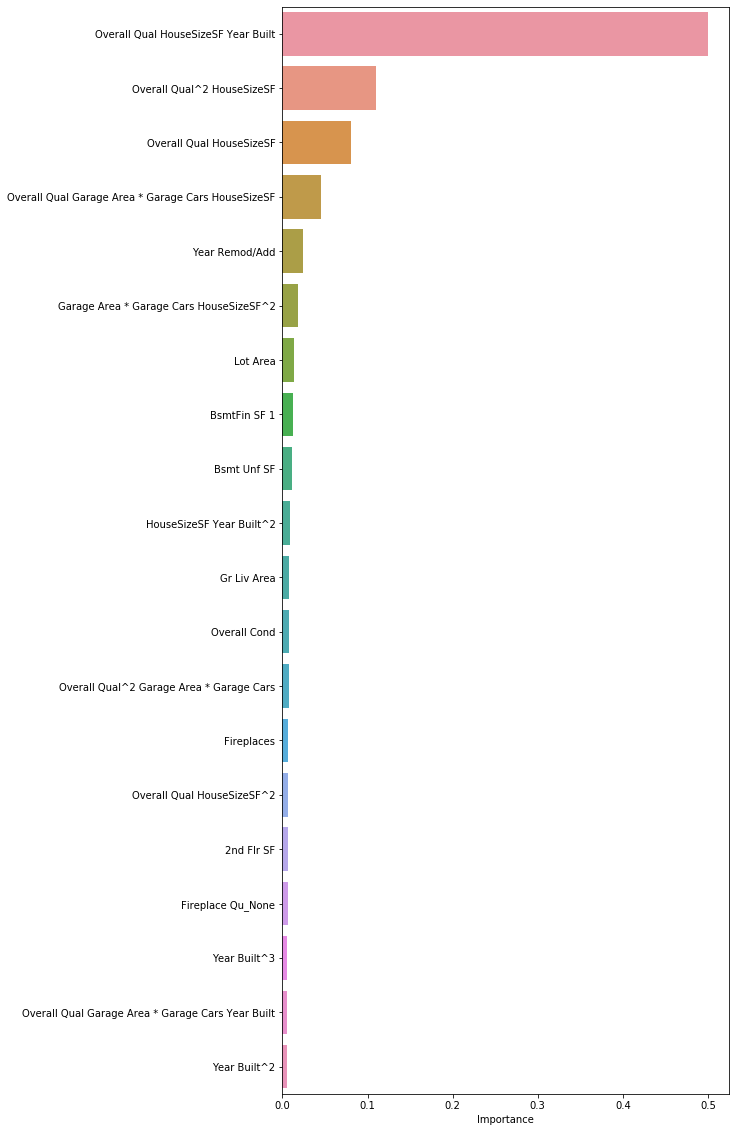

In [53]:
#plotting the 20 most important features that affects the model
plt.figure(figsize=(8, 20))
sns.barplot(data =important_features.iloc[0:20], x='Importance', y= important_features.index[0:20])

The Graph above better explains the importance for each feature to our model. The data frame for this graph gives us the exact Influence for each feature on our model. The most important ones are:
    
    1. The combination of Overall Quality, Total House Size, and year built 
    2. Year Remod/Add with
    3. Year Built with

Overall, Overall Quality is the feature that actually make the most change in regards to the house sale price. The combination of Overall Quality, Total House Size, and year built features account for %50 of the model prediction. These three features together are the most weighted in this model.

### Model Accuracy

In [87]:
#RMSE score > error in dollar
mean_squared_error(y_test, lasso_cv.predict(X_test)) ** .5

21321.774539309088

In [223]:
#error percentage
((abs(lasso_cv.predict(X_test)-y_test)/y_test)*100).mean()

9.210297371137882

This model, on average, can predict house prices within around $21,000.


Text(0.5, 1.0, 'SalePrice: Actual vs. Predicted')

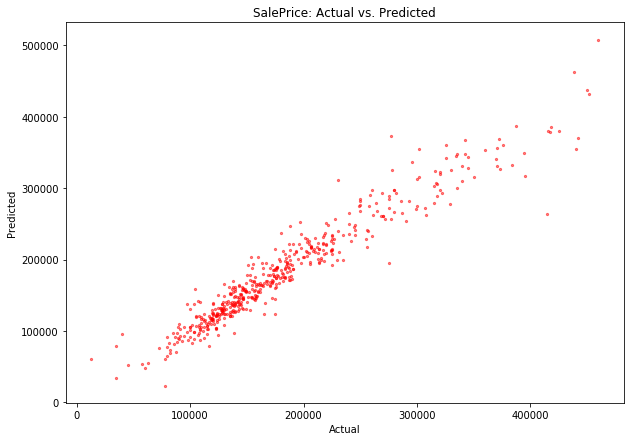

In [224]:
# plotting actual SalePrice vs predicted SalePrice for the 'y_train' data
plt.figure(figsize= (10,7))
plt.scatter(y_test, lasso_cv.predict(X_test),  color='red', alpha=0.5, s=5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SalePrice: Actual vs. Predicted')

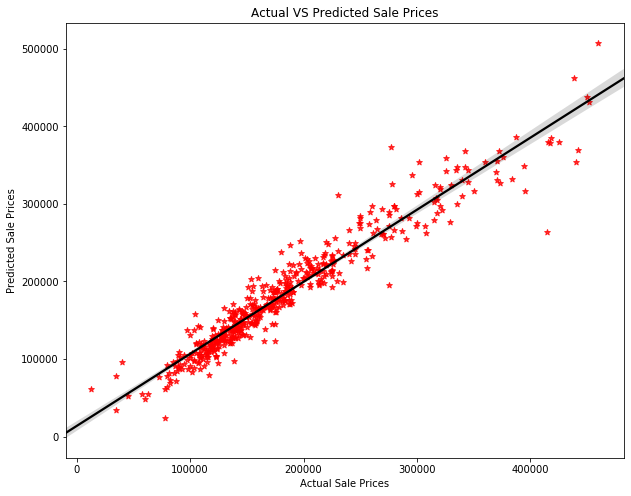

In [225]:
#plotting actual vs predicted with a linear regression model fit
plt.figure(figsize =(10,8))
sns.regplot(y_test, lasso_cv.predict(X_test), color='r', marker="*",line_kws={"color": "black"})
plt.title('Actual VS Predicted Sale Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices');
plt.savefig('figure.pdf')


Lets see the distribution of errors in the predicted sale price values

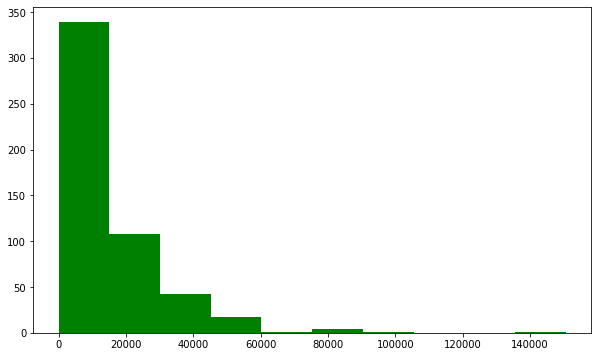

In [226]:
#finds the error between the predicted and the actual sale price values

plt.figure(figsize=(10,6))
pred_error = abs(lasso_cv.predict(X_test)- y_test)
plt.hist(pred_error, color='g');

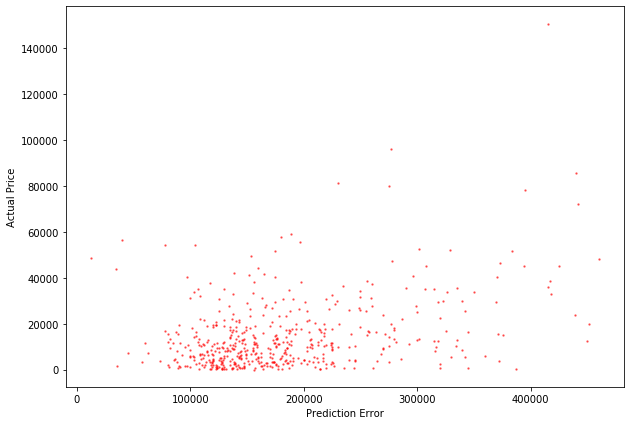

In [227]:
#ploting error vs y_test scatterplot to see if there is a pattern in error
plt.figure(figsize=(10,7))
plt.scatter(y_test, pred_error,  color='red', alpha=0.5, s=8, marker='.')
plt.xlabel('Prediction Error')
plt.ylabel('Actual Price')
plt.savefig('figure.pdf')


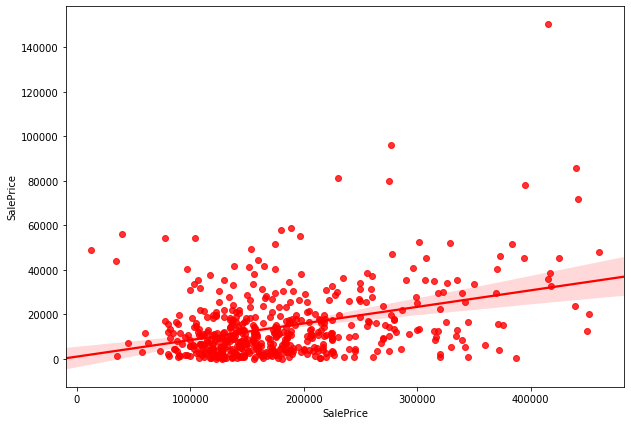

In [228]:
plt.figure(figsize=(10,7))
sns.regplot(y_test, pred_error,color='r')

From the Scatter plot for the error vs our testing data, we can see that we have a small pattern of error in our graph. The Histogram distribution for the pred_error also shows that most of our predicted errors are for houses that were sold for more than $250,000.


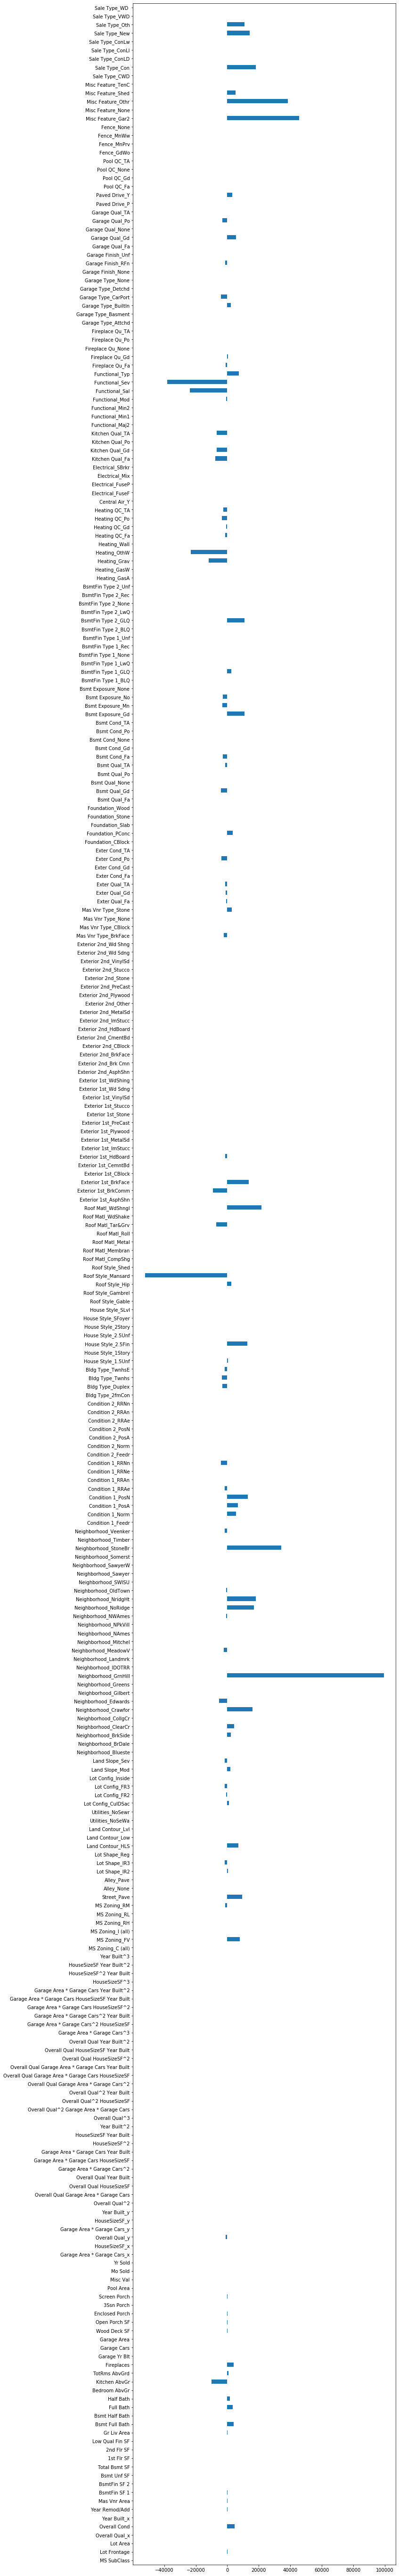

In [229]:
#another way of showing the importance of each feature
pd.Series(lasso_cv.coef_, index=X_train.columns).plot.barh(figsize=(10, 100))

Yup, Lasso does zero some of our coefficients out

## Business Recommendations 

#### Features of high priced houses

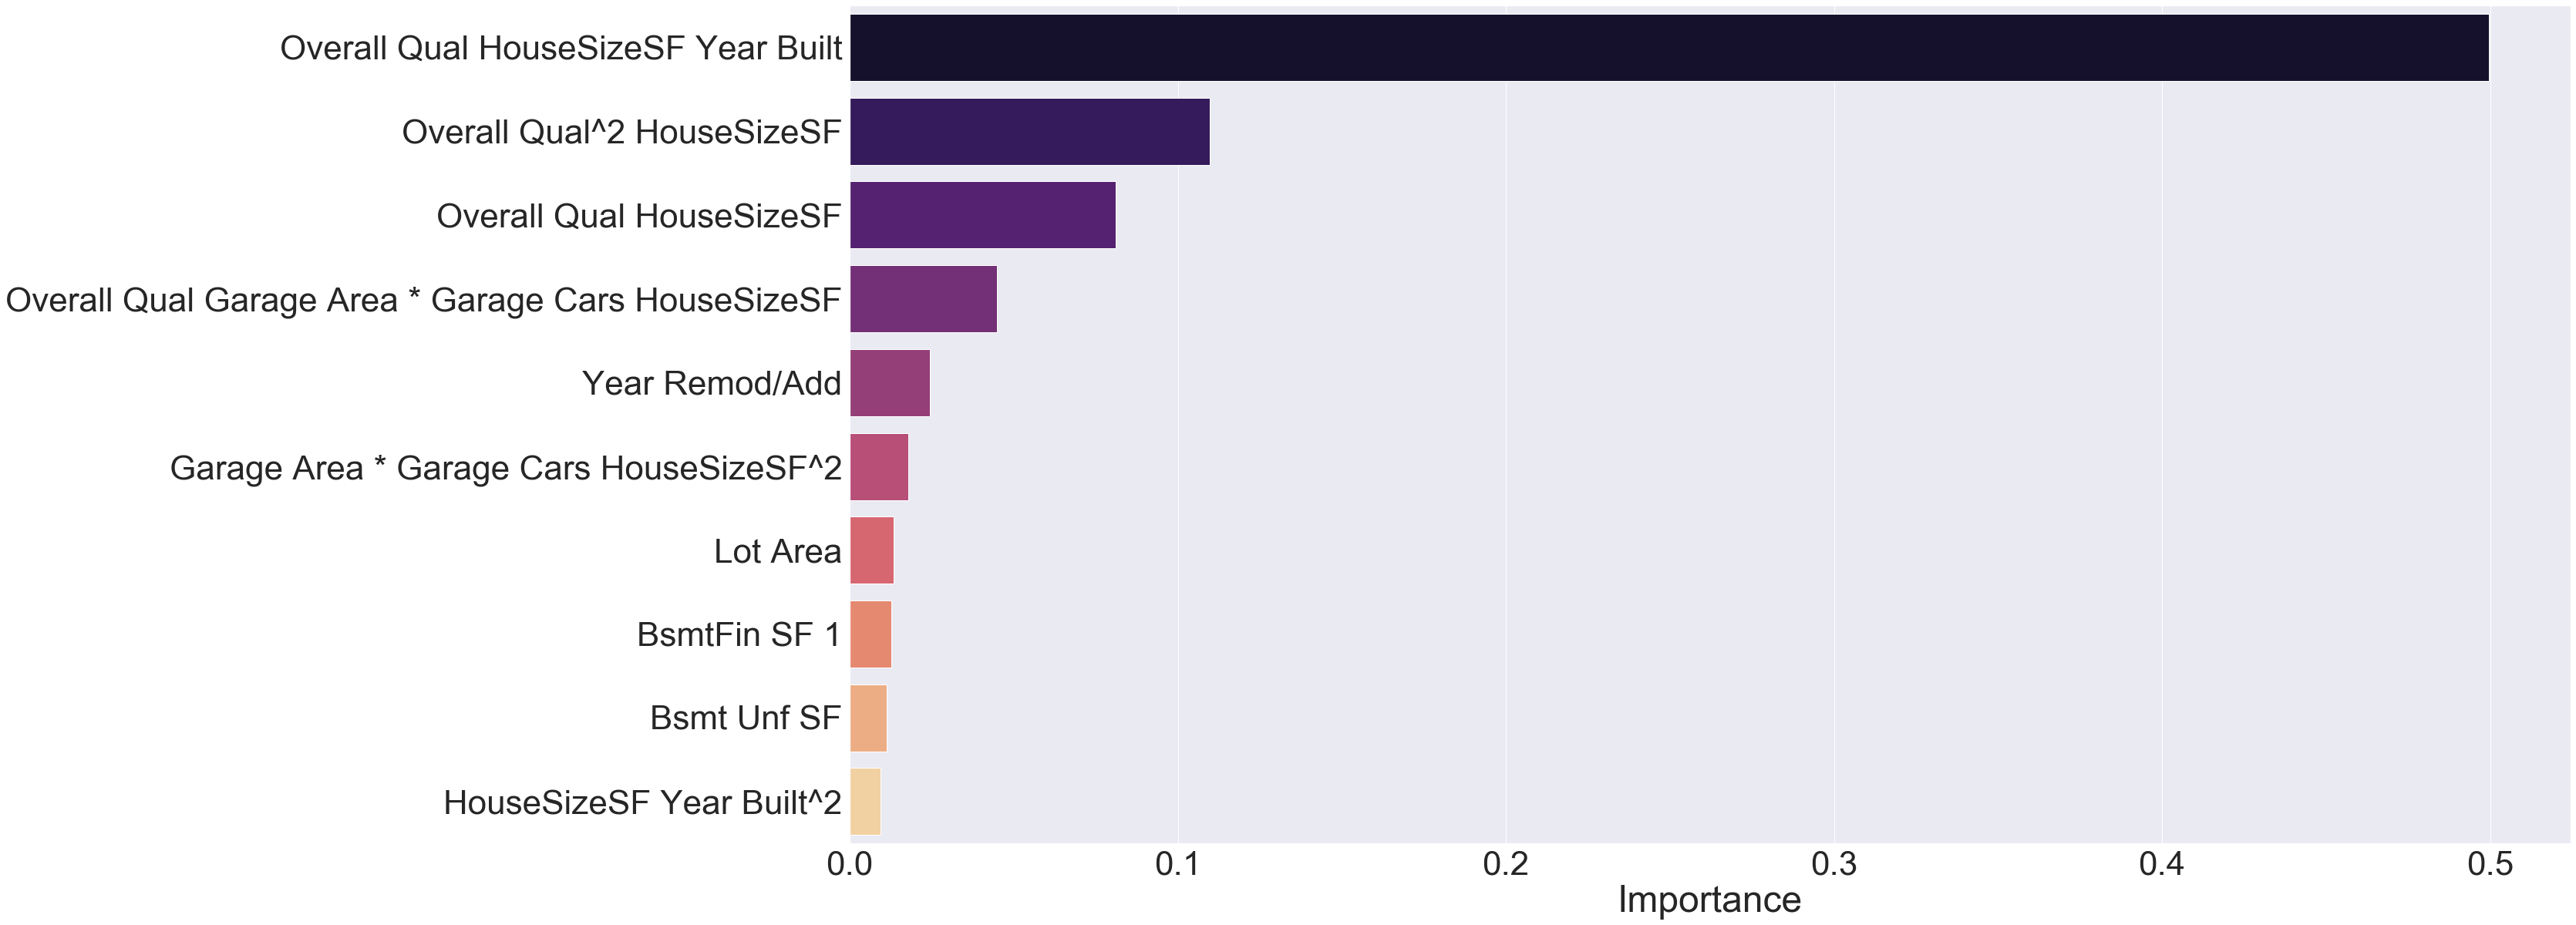

In [85]:
#plotting the 20 most important features that affects the model
sns.set(font_scale=4)
plt.figure(figsize=(40, 20))
sns.barplot(data =important_features.iloc[:10], x='Importance', y= important_features.index[0:10],palette='magma')
# setting label sizes after creation

 Colormap d is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r



Houses that have high sale prices have:
1. High overall quality
2. Bigger overall size (bedrooms, kitchen, basement)
3. Bigger ground living room size
4. Newer Built or newly renevated.
5. The are in the Green Hills neighborhood.
6. They have a second Garage

These features increase the price of houses. The biggest price predictors the house size and the over all quality of it. 

#### Features that hurt the house prices

Features that hurt the house price are not just the opposites from the list above, but also the ones that are:
1. Severely damaged
2. Have Hot water or steam heating system (not gas).
3. Have a Mansard roof style


In General, the houses that are damaged or need a lot of work/money to fix them, they tend to have lower prices.

#### How to increase house size

Homeowners should try to improve their house quality by fixing any damages that are in the house. this will increase the house sale value.
They also need to change their heating system from Hot water or stream that doesn't use gas to something else (preferably gas as it gives the house the best value in regards of heating system)

#note: because we don't have enough data about the heating system, we cant assume that changing the heat system is a good indicator for house price.


In [231]:
train[['Functional', 'SalePrice']].groupby('Functional').mean().sort_values('SalePrice', ascending =False)


,SalePrice
Functional,
Typ,183954.749347
Maj1,163106.166667
Min1,154429.761905
Min2,150424.571429
Mod,148108.724138
Sev,95750.000000
Maj2,87157.714286
Sal,31550.000000


The above shows how damaged houses have less sell values

In [232]:
#saving the mean SalePrice in regards to functionality
saleprice_functional = train[['Functional', 'SalePrice']].groupby('Functional').mean().sort_values('SalePrice')['SalePrice']


In [233]:
#saving the index (functional rating) in regards to the mean SalePrice
functional_index = train[['Functional', 'SalePrice']].groupby('Functional').mean().sort_values('SalePrice').index

In [234]:
#renaming the columns so they display better on the barplot
functional_index = functional_index.map({
    'Sal':'Salvage', 'Maj2' : 'Major',
    'Sev' : 'Severe',  'Mod' : 'Moderate',
    'Min2' : 'Minor', 'Min1' : 'Minor',
     'Typ': 'Typical',  
                     })

functional_index

Index(['Salvage', 'Major', 'Severe', 'Moderate', 'Minor', 'Minor', nan,
       'Typical'],
      dtype='object', name='Functional')

Text(0, 0.5, 'Sale Price')

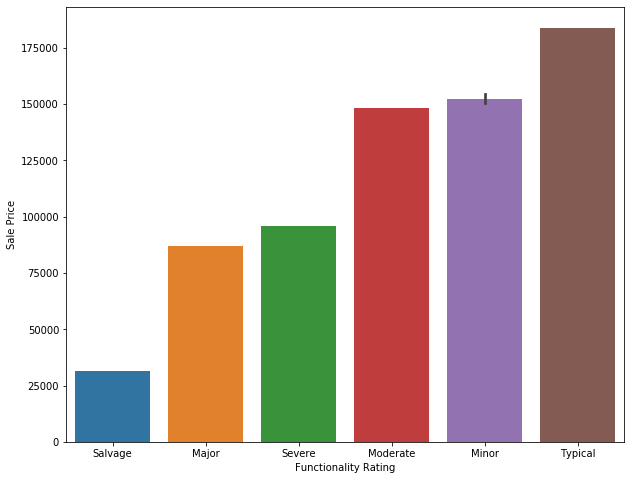

In [235]:

#plotting a bar chart for Functionality type vs SalePrice
plt.figure(figsize=(10,8))
sns.barplot(functional_index,saleprice_functional)
plt.xlabel('Functionality Rating')
plt.ylabel('Sale Price')


We can see how the house price drops based on the severity of damage in the house. 
Looking at houses with major damages, we can see that there is around $100,000 difference between these houses and the the houses that have typical damages to them.

In [236]:
#sorts the Neighbors by the mean hoiuse sale price and groups by the neighborhood column
neighborhoods = train[['Neighborhood',
       'SalePrice']].groupby('Neighborhood').mean().sort_values(by= 'SalePrice')

#selelcting the lowest 5 sale prices in neighborhoods 
bad_neighborhoods = neighborhoods.iloc[:5]

#selelcting the highest 5 sale prices in neighborhoods 
good_neighborhoods = neighborhoods.iloc[-5:]


In [237]:
#dataframe of both neighborhoods
bad_good_neighborhoods = pd.concat([bad_neighborhoods, good_neighborhoods], sort =False)
bad_good_neighborhoods


,SalePrice
Neighborhood,
MeadowV,100231.250000
IDOTRR,101103.188406
BrDale,103371.052632
OldTown,125276.300613
BrkSide,127022.697368
Veenker,253570.588235
GrnHill,280000.000000
NoRidge,316294.125000
NridgHt,322831.352459


In [238]:
#renaming the column for better barplot display
bad_good_neighborhoods.rename(index = {
    'MeadowV' : 'Meadow Village',
    'IDOTRR' :'Iowa DOT and Rail Road',
    'BrDale':'Briardale',
    'OldTown':'Old Town',
    'BrkSide' : 'Brookside',
    'Veenker': 'Veenker',
    'GrnHill' : 'Green Hill',
    'NoRidge':'Northridge',
    'NridgHt':'Northridge Heights',
    'StoneBr':'Stone Brook', 
}, inplace=True)


Text(0.5, 1.0, 'Sale Price VS Neighborhood')

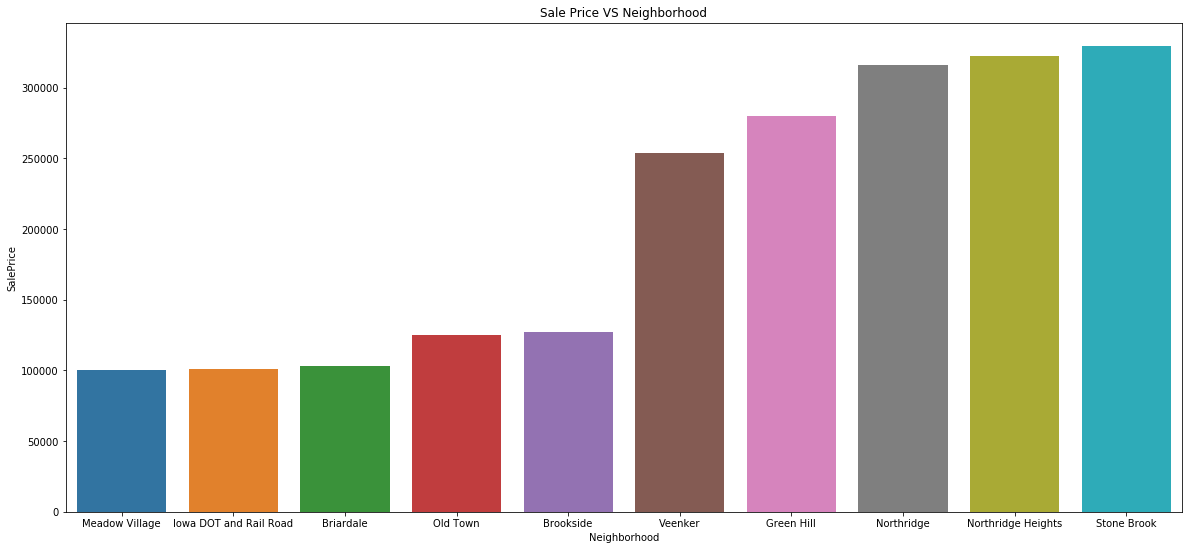

In [239]:
#plotting the top and bottom 5 neighborhoods in regards on their sale price 
plt.figure(figsize=(20,9))
sns.barplot(bad_good_neighborhoods.index,bad_good_neighborhoods['SalePrice'],orient= 'v')
plt.title('Sale Price VS Neighborhood')

### Model Generalization

I think this model an generalize to other cities. The only feature in this data frame that makes it more specific to this city is the Neighborhood feature. Other Cities, of course, will have different house prices depending on their location. Regardless, if we can get a Neighborhood feature for the city we want to compare this model to, it would be sufficient to predict the other city's home prices.

## Conclusion

The data Frame contains a lot of features, some are important and others are not. This model predicts the house prices with an error (RMSE) of 21,300 or a percentage of around %9
This model works good for houses that are for less than 300,000 dollar. After that, the error increases and the predicted house prices become very different from the actual ones. 

To better address this issue, we can split our data into two data frames; for more and less than 300,000 dollar. Doing this will not only make better house prices predictions for more expensive houses, but also our model for houses less than 300,000 dollar will increase sharply. and our %9 error will become much closer to the actual predicted houses.